Class def

In [1]:
using PyPlot

Qt: Untested Windows version 10.0 detected!
INFO: Loading help data...


In [10]:
type Node
    pos
    child
end

In [11]:
function initTree(root)
    return Node(root, Dict())
end

initTree (generic function with 1 method)

In [12]:
function addChild(node::Node, pt)
    node.child[length(node.child)+1]=Node(pt, Dict()) #adds child to node in tree
end


addChild (generic function with 1 method)

In [58]:
function drawTree(root::Node)
    p1=root.pos
    for i=1:length(root.child)
        p2=root.child[i].pos
        #@show [ p1; p2]
        plot([p1[1], p2[1]], [p1[2], p2[2]])  #draw root to child
        drawTree(root.child[i]) #draw subtree
        #p1=root.pos
    end
end


drawTree (generic function with 1 method)

In [59]:
function closestNode(root::Node, pt, thrs=.1)
    #set intial dist
    bestDist=norm(root.pos-pt)
    bestNode=root
    
    for i=1:length(root.child)
        #@show i
        node=root.child[i] #check current node
        dist=norm(node.pos-pt)
        if dist<bestDist  #check each child
            bestDist=dist
            bestNode=node
        end
        closestNode(node, pt, bestNode, bestDist,  thrs)
        
    end
    #@show bestDist
    bestDist>thrs ? addChild(bestNode, pt): return 0
end

function closestNode(root::Node, pt, bestNode::Node, bestDist,  thrs)
    for i=1:length(root.child)
        node=root.child[i] #check current node
        dist=norm(node.pos-pt)
        if dist<bestDist  #check each child
            bestDist=dist
            bestNode=node
        end
        closestNode(node, pt, bestNode, bestDist,  thrs)
    end
end


closestNode (generic function with 3 methods)

In [15]:
function randPt(maxDist, n=2)
    return rand(n)*maxDist
end

randPt (generic function with 2 methods)

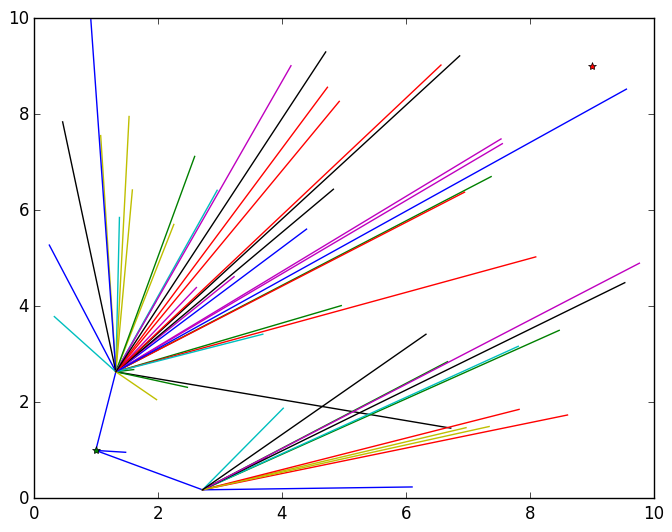

(0,10)

In [69]:
start=[1,1]
goal=[9,9]
global tree=initTree(start)
global bestNode=tree
global bestDist=0
for i=1:50
    pt=randPt(10)
    closestNode(tree, pt)
end

drawTree(tree)

#draw start and end
plot(start[1],start[2], "g*")
plot(goal[1],goal[2], "r*")  

#formated for style
xlim(0, 10)
ylim(0, 10)

pt => [6.728002494034695,1.6482566781881647]


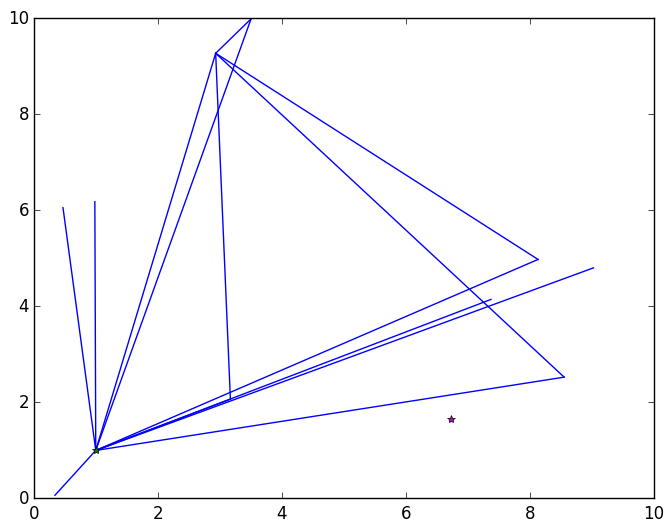

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003852FC88>

In [28]:
pt=randPt(10)
@show pt
closestNode(tree, pt)
drawTree(tree)

plot(start[1],start[2], "g*")
plot(pt[1],pt[2], "m*") 

In [ ]:
length(tree.child[1].child)

In [ ]:
drawTree(tree)

In [ ]:

p1 =[2,3]
p2 =[9.934834258275059,0.2623354584633364]
plot([p1[1],p2[1]], [p1[2],p2[2]]) 

In [ ]:
[root; [4 5]]

In [ ]:
for i=1:1
    print("HI")
end